# Day7 データの前処理

## 前処理の方針の決定

### 事前準備

In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# データセットのインポート
train=pd.read_csv("./titanic/train.csv")
test=pd.read_csv("./titanic/test.csv")

データの中身を確認

In [3]:
# trainの概要を取得
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# testの概要を取得
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# trainの先頭5行を表示
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# trainの末尾5行を表示
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# ランダムにデータを抽出する
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
189,190,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S


欠損値の確認

In [8]:
# trainに含まれている欠損値の確認
# trainの各要素が欠損値であればTrue, そうでなければFalseを表示
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [9]:
# カラムごとに含まれている欠損値の数を表示
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# カラムごとに含まれている欠損値「でない」数を表示
train.notnull().sum() 

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## Titanic データセットの可視化

## 外れ値の確認

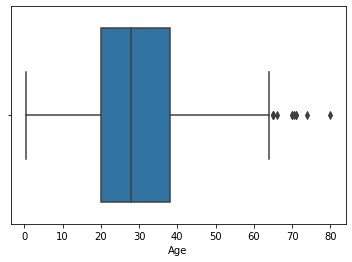

In [11]:
# 箱ひげ図による量的変数"Age"の可視化
sns.boxplot(train["Age"])
plt.show()

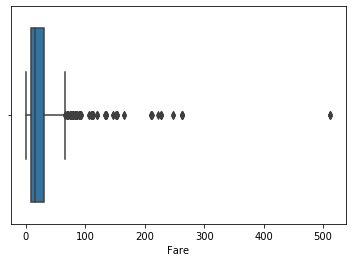

In [12]:
# # 箱ひげ図による量的変数"Fare"の可視化
sns.boxplot(train["Fare"])
plt.show()

/Users/daikimorita/anaconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/daikimorita/anaconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


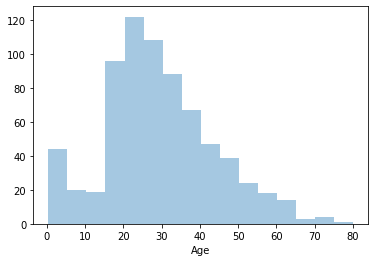

In [13]:
# trainデータの"Age"コラムを、16個の階級でヒストグラム表示
# 現状では欠損値を含むため、kde=Falseとして滑らかな線は求めない
sns.distplot(train["Age"], bins = 16, kde=False)

In [14]:
train["Age"].value_counts().tail(15)

24.50    1
0.67     1
14.50    1
0.92     1
74.00    1
34.50    1
80.00    1
12.00    1
36.50    1
53.00    1
55.50    1
70.50    1
66.00    1
23.50    1
0.42     1
Name: Age, dtype: int64

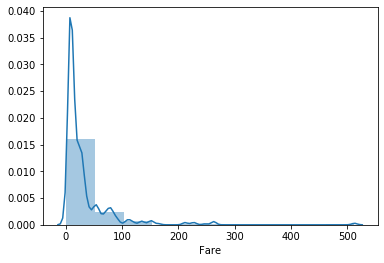

8.6542     1
8.7125     1
61.3792    1
6.9500     1
9.8417     1
8.3000     1
13.7917    1
9.4750     1
13.4167    1
26.3875    1
8.4583     1
9.8375     1
8.3625     1
14.1083    1
17.4000    1
Name: Fare, dtype: int64

In [15]:
# trainの"Fare"コラムを、10個の階級でヒストグラム表示
sns.distplot(train["Fare"], bins = 10)
plt.show()
train["Fare"].value_counts().tail(15)

### 各要素と生存との関係を可視化

In [16]:
#train.corr()はデータの各要素（各列）同士の相関係数を表形式で視覚化する
#文字列データは自動的に外してくれる
train.corr().style.background_gradient(cmap="autumn_r")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.00500666,-0.035144,0.0368472,-0.0575268,-0.00165201,0.0126582
Survived,-0.00500666,1,-0.338481,-0.0772211,-0.0353225,0.0816294,0.257307
Pclass,-0.035144,-0.338481,1,-0.369226,0.0830814,0.0184427,-0.5495
Age,0.0368472,-0.0772211,-0.369226,1,-0.308247,-0.189119,0.0960667
SibSp,-0.0575268,-0.0353225,0.0830814,-0.308247,1,0.414838,0.159651
Parch,-0.00165201,0.0816294,0.0184427,-0.189119,0.414838,1,0.216225
Fare,0.0126582,0.257307,-0.5495,0.0960667,0.159651,0.216225,1


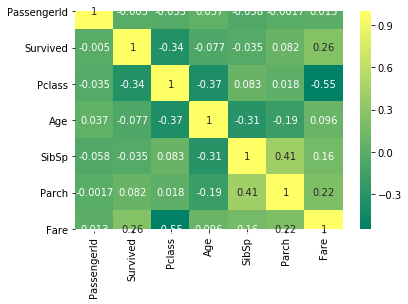

In [17]:
# seabornのheatmapを用いて量的変数の相関を可視化
sns.heatmap(train.corr(), cmap = "summer", annot = True)
plt.show()

### 性別と生存率の関係

In [18]:
# 性別ごとに生存した人数を表示
train.groupby(["Sex"])["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

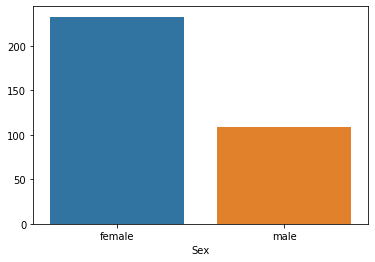

In [19]:
# trainデータの"Survived"列の和を性別毎に求め、可視化する
sum_survived = train.groupby(["Sex"])["Survived"].sum()
sns.barplot(sum_survived.keys(), sum_survived.values)
plt.show()

上の方法では、生き残った人数しかわからないため、亡くなった人数も同時に調べたい。<br>
女性で亡くなった人数、生き残った人数<br>
男性で亡くなった人数、生き残った人数<br>
を取得しよう。

In [20]:
# trainのカラム"Survived"を、"Sex"とSurvivedで集計
# 生死それぞれが集計される
train.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

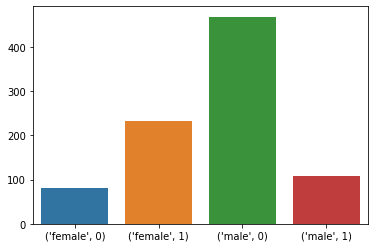

In [21]:
# trainのカラム"Survived"を"Sex"とSurvivedで集計し、棒グラフで表示
data_count = train.groupby(["Sex","Survived"])["Survived"].count()
sns.barplot(data_count.keys(), data_count.values)
plt.show()

性別ごとに生存率を求めてみよう

In [22]:
# 男女のそれぞれの生存率を求める
train.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### 港と生存率の関係

In [23]:
# 乗船した場所と生存率をクロス集計
train.groupby(["Embarked", "Survived"])["Survived"].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

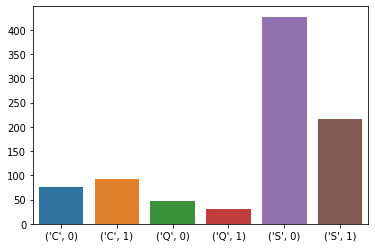

In [24]:
# 乗船した場所と生存率をクロス集計し、棒グラフで表示
data_count = train.groupby(["Embarked", "Survived"])["Survived"].count()
sns.barplot(data_count.keys(), data_count.values)
plt.show()

In [25]:
# 乗船した場所ごとの生存率を計算
train.groupby(["Embarked"])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

年齢と生存率の関係

# 前処理の実施

In [26]:
#名前は敬称だけ抜き取る
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

#"Title"という列を作り、その中に全員分の敬称を収録する
for df in [train,test]:
    df['Title'] = df['Name'].apply(get_title)

In [27]:
train["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

全ての敬称に対して、どの敬称がいくつずつ含まれているのかを調べる

In [28]:
#trainのTitle列の各要素の個数を表示
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Capt          1
Don           1
Ms            1
Countess      1
Sir           1
Jonkheer      1
Lady          1
Mme           1
Name: Title, dtype: int64

In [29]:
#testのTitle列の各要素の個数を表示
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [30]:
for df in [train, test]:
    
    # "Mlle","Ms","Mme" は Miss に置き換え
    df['Title'] =df['Title'].replace(["Mlle","Ms","Mme"],"Miss") 
    
    # それ以外はOthersへ
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')

改めて、どの敬称がいくつずつ含まれているのかを調べる

In [31]:
train.Title.value_counts()

Mr        517
Miss      186
Mrs       125
Master     40
Others     23
Name: Title, dtype: int64

In [32]:
test.Title.value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: Title, dtype: int64

**欠損値処理**

改めてtrain、testそれぞれについて各列における欠損値の個数を確認

In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [34]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

欠損値処理: Embarked

In [35]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

"S"が最も多いようなので、欠損値に"S"を代入

In [36]:
train.Embarked=train.Embarked.fillna("S")

In [37]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### 欠損値処理: Age

In [38]:
train.groupby("Title")["Age"].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.368090
Mrs       35.898148
Others    45.545455
Name: Age, dtype: float64

In [39]:
for df in [train, test]:
    mean = df.groupby("Title")["Age"].mean()
    for title in mean.keys():
        df.loc[(df.Age.isnull())&(df.Title==title),"Age"] = mean[title]
#unique()は重複しない値をリストにして返すpandasの関数

In [40]:
#参考
mean.keys()

Index(['Master', 'Miss', 'Mr', 'Mrs', 'Others'], dtype='object', name='Title')

#### 欠損値処理: Fare

testのFareが１箇所欠けているので、これを埋めよう。<br>
高々１箇所なので、testの他のFare列の中央値を入れてしまえば十分だろう。

In [41]:
#testのFareを埋める
test.Fare=test.Fare.fillna(test.Fare.median())

In [42]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [43]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

数値データのカテゴライズ化

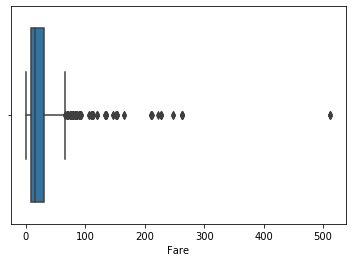

In [44]:
sns.boxplot(train["Fare"])
plt.show()

In [45]:
for df in [train, test]:
    df['Age_band'] = pd.cut(df["Age"], [0, 22, 30, 37, 59, 100], labels=range(5), right=False)

In [46]:
train['Age_band'].head()

0    1
1    3
2    1
3    2
4    2
Name: Age_band, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [47]:
for df in [train, test]:
    df['Fare_band'] = pd.cut(df["Fare"], [0, 8, 15, 31, 66, 520], labels=range(5), right=False)

In [48]:
train['Fare_band'].head()

0    0
1    4
2    0
3    3
4    1
Name: Fare_band, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

カテゴライズ化した要素を切り口としてグラフ化

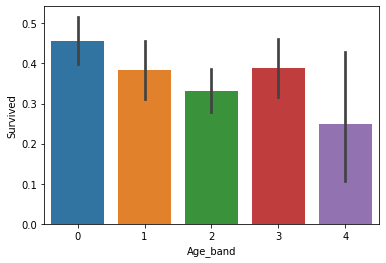

In [49]:
sns.barplot(train["Age_band"], train["Survived"])
plt.show()

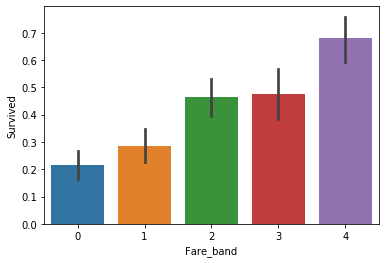

In [50]:
sns.barplot(train["Fare_band"], train["Survived"])
plt.show()

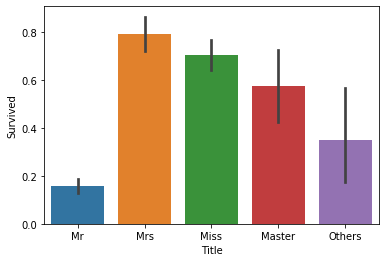

In [51]:
sns.barplot(train["Title"], train["Survived"])
plt.show()

<b>不要データの削除</b><br><br>
・PassengerId・・・形式が扱いにくい（クラス分類しにくい）上に、あまり生死と関係がなさそう<br>
・Name・・・敬称を集めたTitle列を作ったので用済み<br>
・Ticket・・・規則性が見出せず扱いに困る<br>
・Cabin・・・欠損地が多すぎたので不採用<br>
・Age・・・Age_bandを作ったので用済み<br>
・Fare・・・Fare_bandを作ったので用済み

In [52]:
drop_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin','Age','Fare']
# 上の6つのcolumn名をリストに。

このリストに含まれるcolumnをtrain,testから削除しよう

In [53]:
train = train.drop(drop_columns, axis = 1)
test  = test.drop(drop_columns, axis = 1)

<b>データを全て数字に置き換えよう</b><br>
いま文字列の形で記述されているのは<br>
・Sex列<br>
・Title列<br>
・Embarked列<br>
である。いずれもカテゴリであるので、ラベルとして数字を割り当ててあげればよい。<br>
（例)　Mr:0,  Miss:1, Mrs:2　・・・など

In [54]:
for df in [train, test]:
    # 性別を数字でおきかえ
    df.loc[df['Sex']=="female", "Sex"]=0
    df.loc[df['Sex']=='male','Sex']=1
    
    # 敬称を数字で置き換え
    df.loc[df['Title']=='Mr', 'Title']=0
    df.loc[df['Title']=='Miss', 'Title']=1
    df.loc[df['Title']=='Mrs', 'Title']=2
    df.loc[df['Title']=='Master', 'Title']=3
    df.loc[df['Title']=='Others', 'Title']=4
    
    # 乗船した港３種類を数字でおきかえ
    df.loc[df['Embarked']=='S', 'Embarked']=0
    df.loc[df['Embarked']=='C', 'Embarked']=1
    df.loc[df['Embarked']=='Q', 'Embarked']=2

In [55]:
#train["Survived"]
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
0,0,3,1,1,0,0,0,1,0
1,1,1,0,1,0,1,2,3,4
2,1,3,0,0,0,0,1,1,0
3,1,1,0,1,0,0,2,2,3
4,0,3,1,0,0,0,0,2,1


In [56]:
# train.Fare_band = train.Fare_band.astype(int)

In [57]:
train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.106811,0.406705
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,0.045702,-0.172362
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.116569,-0.501646
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,-0.059961,0.270361
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,-0.078665,0.316560
Embarked,0.106811,0.045702,-0.116569,-0.059961,-0.078665,1.000000,0.044341
Title,0.406705,-0.172362,-0.501646,0.270361,0.316560,0.044341,1.000000


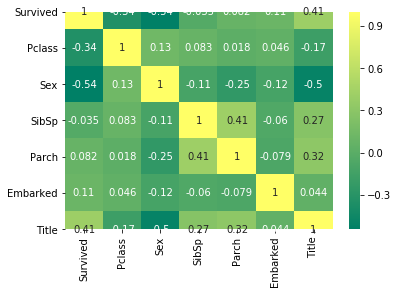

In [58]:
# Title, Age_band, Fare_bandを含む各変数の相関
sns.heatmap(train.corr(), cmap = "summer", annot = True)

## 前処理を施したデータの保存

In [59]:
# pickle形式でデータを保存
# train
train.to_pickle("./titanic/titanic_train.pkl")

# test
test.to_pickle("./titanic/titanic_test.pkl")

In [60]:
#読み込むときは
train = pd.read_pickle("./titanic/titanic_train.pkl")
test = pd.read_pickle("./titanic/titanic_test.pkl")

In [61]:
# train
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
0,0,3,1,1,0,0,0,1,0
1,1,1,0,1,0,1,2,3,4
2,1,3,0,0,0,0,1,1,0
3,1,1,0,1,0,0,2,2,3
4,0,3,1,0,0,0,0,2,1


In [62]:
# test
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
0,3,1,0,0,2,0,2,0
1,3,0,1,0,0,2,3,0
2,2,1,0,0,2,0,4,1
3,3,1,0,0,0,0,1,1
4,3,0,1,1,0,2,1,1
